In [1]:
"""
This script can be used to replicate the experiment described in the paper and check for the same results. 
The script has the following structure:
    - Importing necessary libraries and loading data
    - Friends Dataset Analysis
    - Shakespeare Dataset Analysis
    - Reddit Dataset Analysis
    - AI Dataset Analysis
    - T-Test between Human and AI Deltas and results visualization
"""

'\nThis script can be used to replicate the experiment described in the paper and check for the same results. \nThe script has the following structure:\n    - Importing necessary libraries and loading data\n    - Friends Dataset Analysis\n    - Shakespeare Dataset Analysis\n    - Reddit Dataset Analysis\n    - AI Dataset Analysis\n    - T-Test between Human and AI Deltas and results visualization\n'

In [ ]:
# Libraries used in this project

from empath import Empath
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.patheffects as pe
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [3]:
# Functions used in this project

def dialogue_matrix(episodio):
    dialogue_matrix = []
    for _, row in episodio.iterrows():
        line = row['line']
        dialogue_matrix.append(line)
    return dialogue_matrix

def remove_urls(text):
    words = text.split()
    words = [word for word in words if not word.startswith("http")]
    return " ".join(words)

In [4]:
# Creating an instance of the Empath lexicon
lexicon = Empath()

In [ ]:
# Upload the dataset of Human dialogues from Kaggle
dataset_friends = pd.read_csv()
dataset_shakespeare = pd.read_csv()
dataset_reddit = pd.read_csv()

FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\Riccardo\\OneDrive - UNIVERSITA' CARLO CATTANEO - LIUC\\MeanValue\\Dataset\\chatgpt-reddit-comments.csv"

In [ ]:
# Upload the AI-generated dialogues dataset
dataset = 

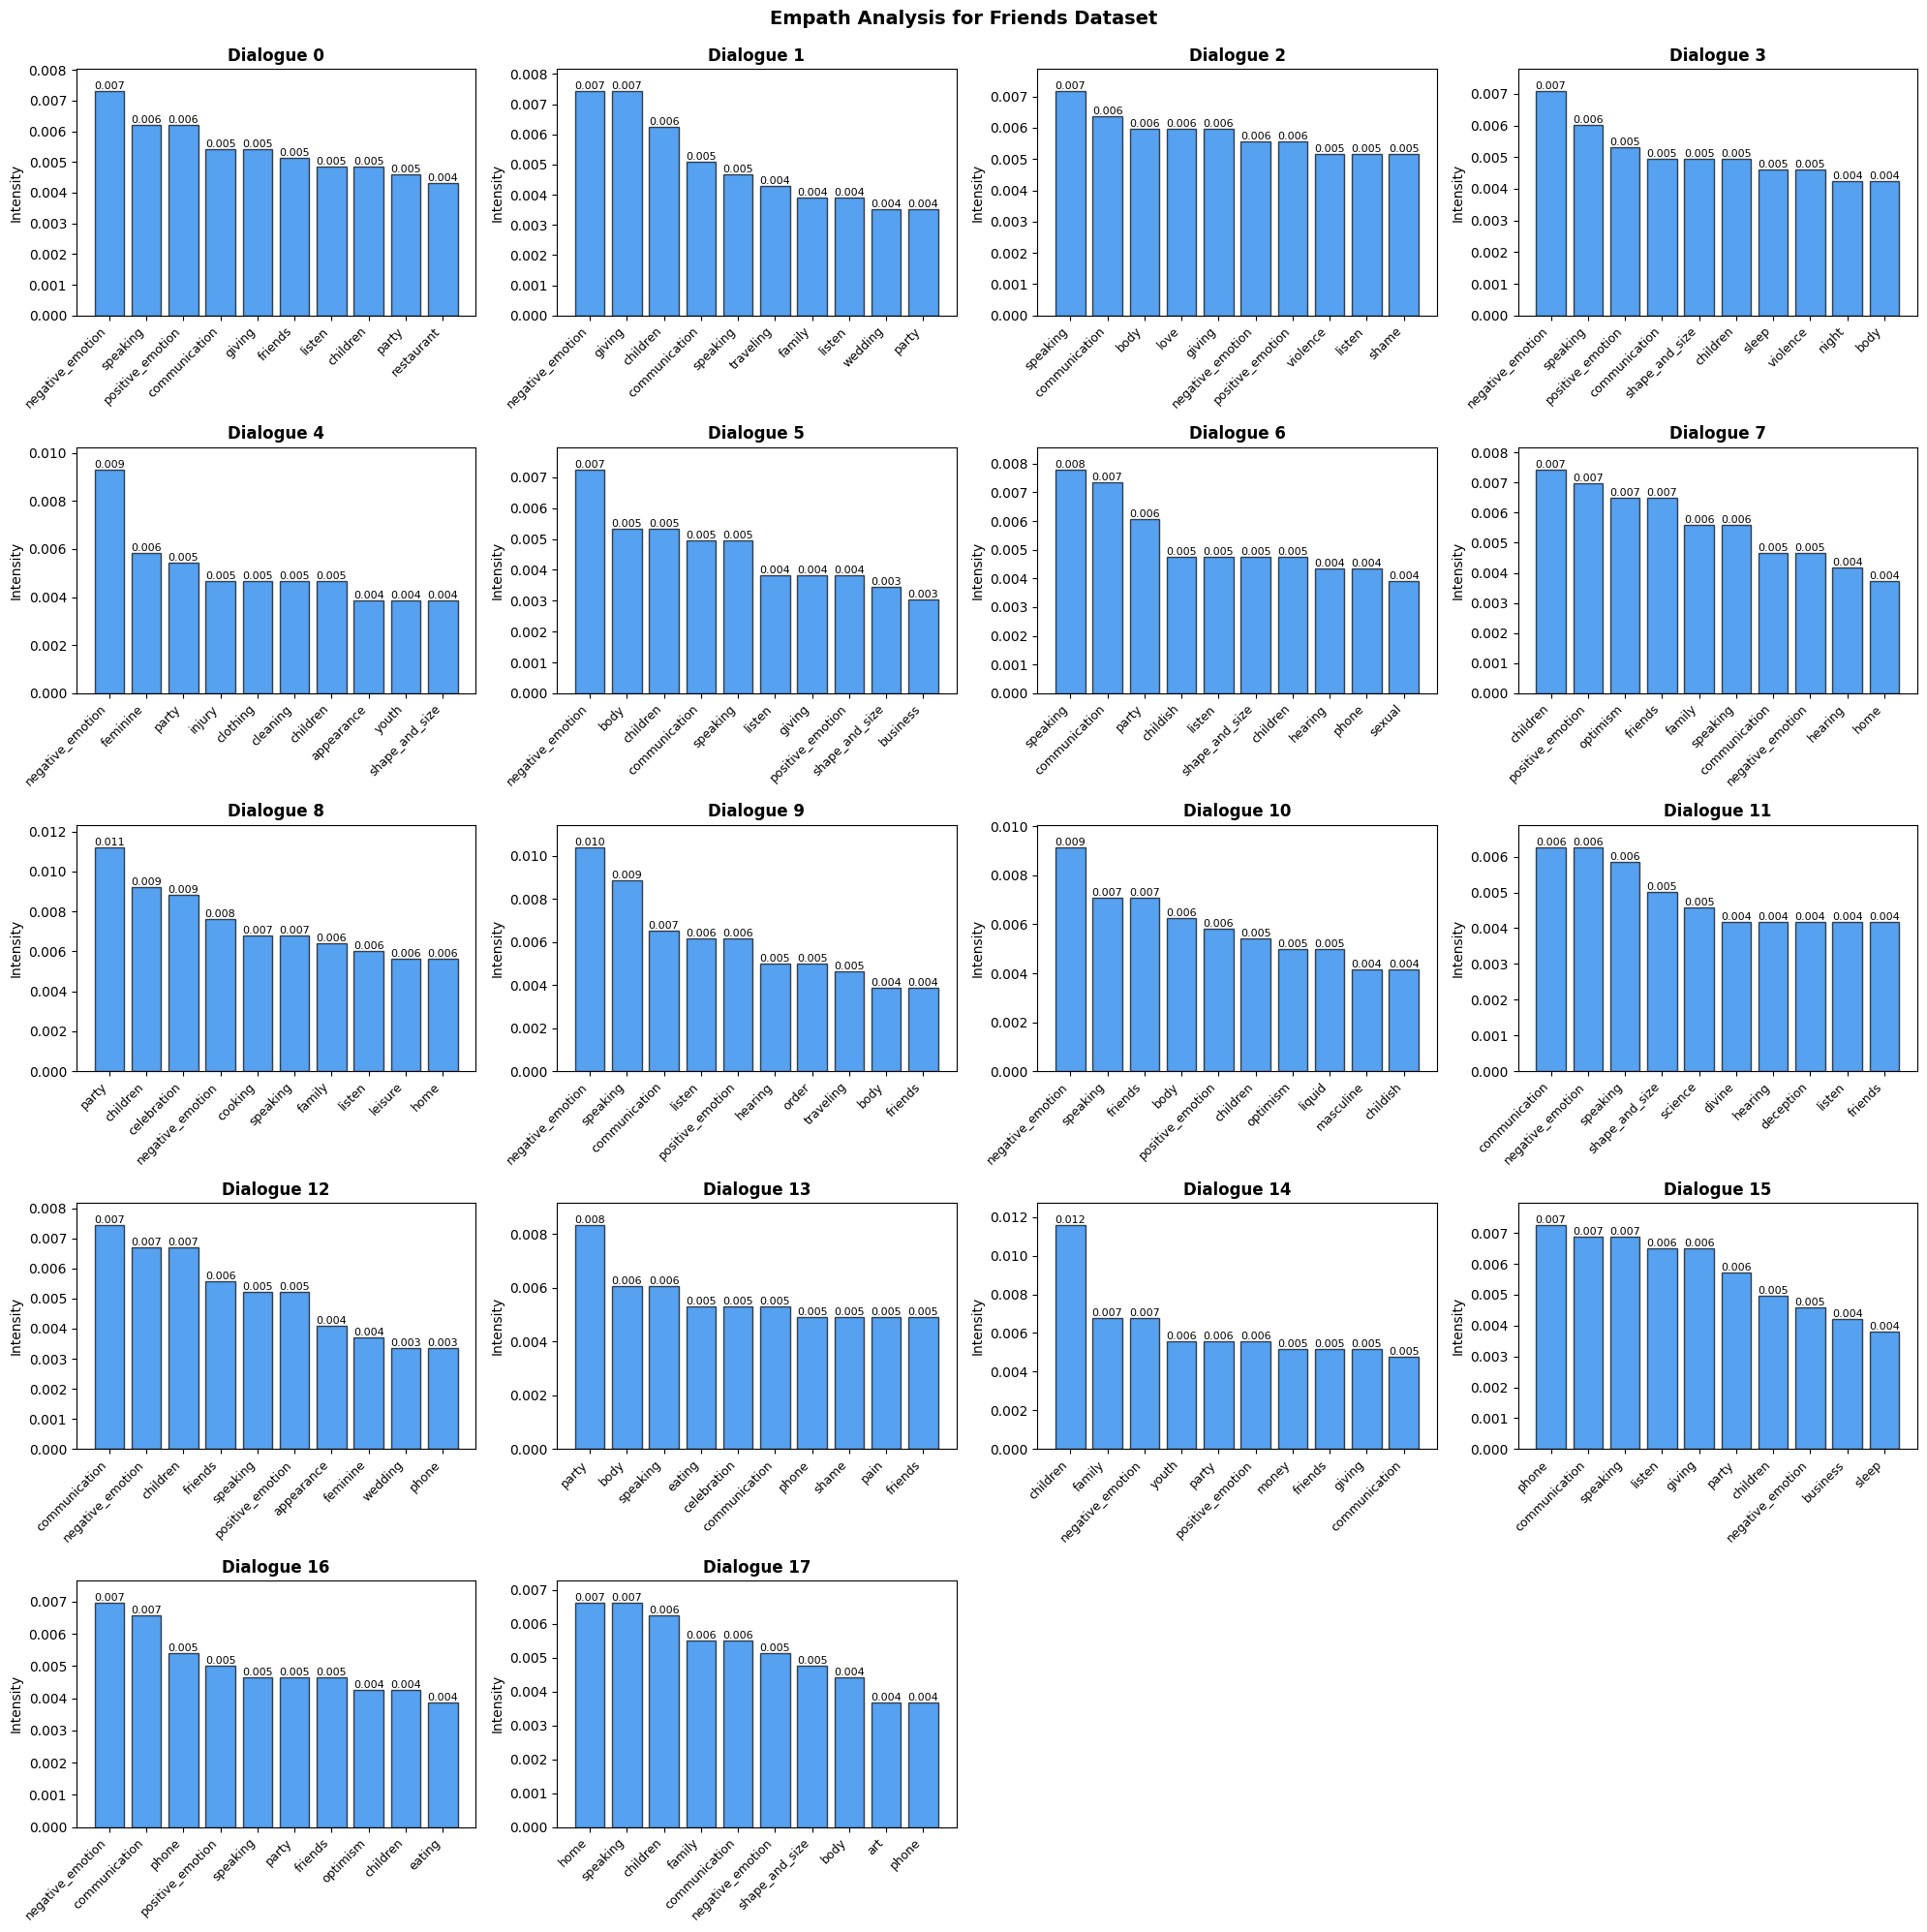

Dialogue 0: negative_emotion (0.0073) - speaking (0.0062) = Delta: 0.0011
Dialogue 1: negative_emotion (0.0074) - giving (0.0074) = Delta: 0.0000
Dialogue 2: speaking (0.0072) - communication (0.0064) = Delta: 0.0008
Dialogue 3: negative_emotion (0.0071) - speaking (0.0060) = Delta: 0.0011
Dialogue 4: negative_emotion (0.0093) - feminine (0.0058) = Delta: 0.0035
Dialogue 5: negative_emotion (0.0073) - body (0.0053) = Delta: 0.0019
Dialogue 6: speaking (0.0078) - communication (0.0074) = Delta: 0.0004
Dialogue 7: children (0.0074) - positive_emotion (0.0070) = Delta: 0.0005
Dialogue 8: party (0.0112) - children (0.0092) = Delta: 0.0020
Dialogue 9: negative_emotion (0.0104) - speaking (0.0088) = Delta: 0.0015
Dialogue 10: negative_emotion (0.0091) - speaking (0.0071) = Delta: 0.0021
Dialogue 11: communication (0.0063) - negative_emotion (0.0063) = Delta: 0.0000
Dialogue 12: communication (0.0074) - negative_emotion (0.0067) = Delta: 0.0007
Dialogue 13: party (0.0083) - body (0.0061) = De

In [ ]:
# Friends Dataset - Some episodes have been selected as example

# Dataset Friends (Season 1) 
empath1 = []
for i in range(1,10,1):
    episode = dataset_friends[(dataset_friends['season_number'] == 1) & (dataset_friends['episode_number'] == i)]
    empath1.append(lexicon.analyze(dialogue_matrix(episode), normalize=True))

# Dataset Friends (Season 2)
empath2 = []
for i in range(1,10,1):
    episode = dataset_friends[(dataset_friends['season_number'] == 2) & (dataset_friends['episode_number'] == i)]
    empath2.append(lexicon.analyze(dialogue_matrix(episode), normalize=True))

empath_friends = empath1 + empath2
n_epochs = len(empath_friends)
cols = 4
rows = math.ceil(n_epochs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
axes = axes.flatten()  # Appiattisci per iterare facilmente

for epoch, risultati in enumerate(empath_friends):
    ax = axes[epoch]
    
    # Order the categories by value in descending order and take the top 10
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)[:10]
    
    if sorted_categories:
        categories, values = zip(*sorted_categories)
        
        # Create the bar plot
        bars = ax.bar(range(len(categories)), values, color='#0F79EB', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Intensity', fontsize=10)
        ax.set_title(f'Dialogue {epoch}', fontsize=12, fontweight='bold')
        ax.set_ylim(0, max(values) * 1.1)
        
        # Add value labels on top of the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{value:.3f}',
                   ha='center', va='bottom', fontsize=8)
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)

# Hide any unused subplots
for idx in range(len(empath_friends), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Empath Analysis for Friends Dataset', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Compute the delta between the first and second category for each episode and print the results
deltas_friends = []

for epoch, risultati in enumerate(empath_friends):
    # Order the categories by value in descending order
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_categories) >= 2:
        # Take the first and second category values
        first_value = sorted_categories[0][1]
        second_value = sorted_categories[1][1]
        
        # Compute the delta
        delta = first_value - second_value
        deltas_friends.append(delta)
        
        print(f"Dialogue {epoch}: {sorted_categories[0][0]} ({first_value:.4f}) - {sorted_categories[1][0]} ({second_value:.4f}) = Delta: {delta:.4f}")
    else:
        print(f"Dialogue {epoch}: Not enough categories to compute delta")

# Compute the average delta and print the results
if deltas_friends:
    media_delta = np.mean(deltas_friends)
    print(f"\n{'='*60}\n")
    print(f"Average delta: {media_delta:.4f}")
    print(f"Number of dialogues analyzed: {len(deltas_friends)}")
    print(f"Standard deviation: {np.std(deltas_friends):.4f}")
else:
    print("No delta calculated")

Play 1): All's Well That Ends Well
Play 2): As You Like It
Play 3): The Comedy of Errors
Play 4): Cymbeline
Play 5): Love's Labours Lost
Play 6): Measure for Measure
Play 7): The
Merry Wives of Windsor
Play 8): The Merchant of Venice
Play 9): A Midsummer Night's Dream
Play 10): Much Ado About Nothing
Play 11): Pericles, Prince of Tyre
Play 12): Taming of the Shrew
Play 13): The Tempest
Play 14): Troilus and Cressida
Play 15): Twelfth Night
Play 16): Two Gentlemen of Verona
Play 17): Winter's Tale
Play 18): Henry IV, part 1
Play 19): Henry IV, part 2
Play 20): Henry V
Play 21): Henry VI, part 1
Play 22): Henry VI, part 2
Play 23): Henry VI, part 3
Play 24): Henry VIII
Play 25): King John
Play 26): Richard II
Play 27): Richard III
Play 28): Antony and Cleopatra
Play 29): Coriolanus
Play 30): Hamlet
Play 31): Julius Caesar
Play 32): King Lear
Play 33): Macbeth
Play 34): Othello
Play 35): Romeo and Juliet
Play 36): Timon of Athens
Play 37): Titus Andronicus


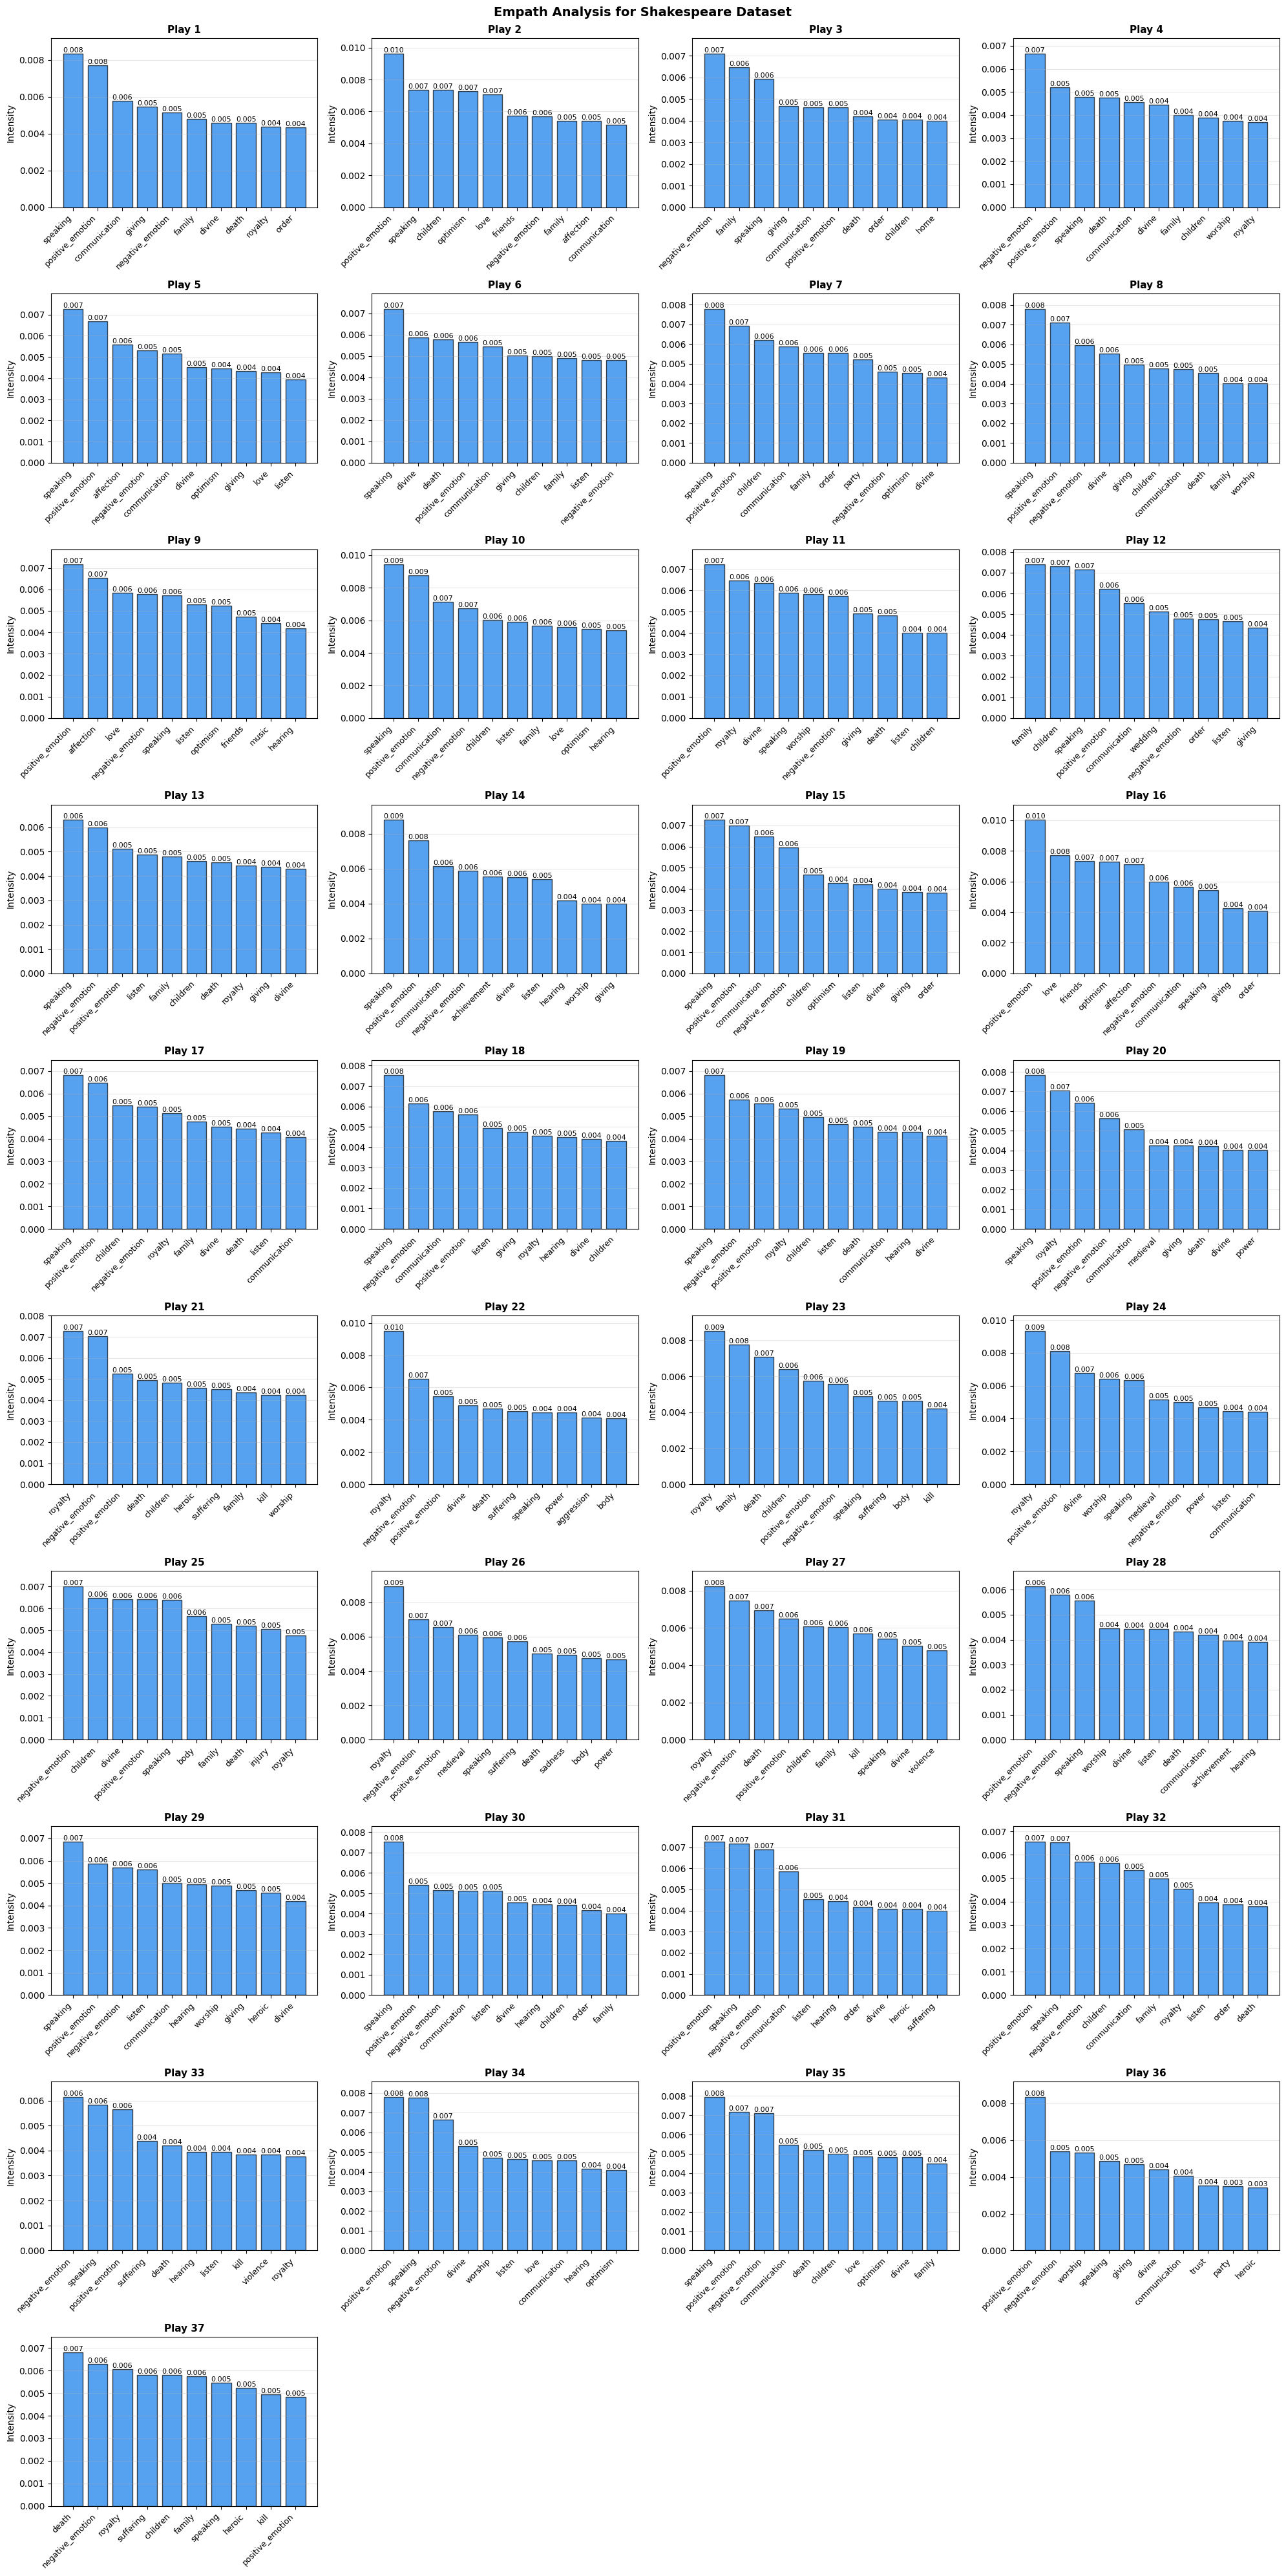

Play 0: speaking (0.0083) - positive_emotion (0.0077) = Delta: 0.0006
Play 1: positive_emotion (0.0096) - speaking (0.0074) = Delta: 0.0023
Play 2: negative_emotion (0.0071) - family (0.0065) = Delta: 0.0006
Play 3: negative_emotion (0.0067) - positive_emotion (0.0052) = Delta: 0.0015
Play 4: speaking (0.0073) - positive_emotion (0.0067) = Delta: 0.0006
Play 5: speaking (0.0072) - divine (0.0059) = Delta: 0.0013
Play 6: speaking (0.0078) - positive_emotion (0.0069) = Delta: 0.0009
Play 7: speaking (0.0078) - positive_emotion (0.0071) = Delta: 0.0007
Play 8: positive_emotion (0.0072) - affection (0.0065) = Delta: 0.0006
Play 9: speaking (0.0094) - positive_emotion (0.0088) = Delta: 0.0007
Play 10: positive_emotion (0.0072) - royalty (0.0065) = Delta: 0.0007
Play 11: family (0.0074) - children (0.0073) = Delta: 0.0001
Play 12: speaking (0.0063) - negative_emotion (0.0060) = Delta: 0.0003
Play 13: speaking (0.0088) - positive_emotion (0.0076) = Delta: 0.0012
Play 14: speaking (0.0073) - p

In [ ]:
# Shakespeare Dataset

# Shakespeare's play
plays = dataset_shakespeare['play_name'].unique()
i = 1
for play in plays:
    print(f"Play {i}): {play}")
    i += 1

empath_shakespeare = []
for play in plays:
    play_data = dataset_shakespeare[dataset_shakespeare['play_name'] == play]
    dialogue = np.array(play_data[['text']])

    dialogue = ' '.join(play_data['text'].astype(str))
    empath_shakespeare.append(lexicon.analyze(dialogue, normalize=True))

n_epochs = len(empath_shakespeare)
cols = 4
rows = math.ceil(n_epochs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
axes = axes.flatten()  

for epoch, risultati in enumerate(empath_shakespeare):
    ax = axes[epoch]
    
    # Order the categories by value in descending order and take the top 10
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)[:10]
    
    if sorted_categories:
        categories, values = zip(*sorted_categories)
        
        # Create the bar plot
        bars = ax.bar(range(len(categories)), values, color='#0F79EB', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Intensity', fontsize=10)
        ax.set_title(f'Play {epoch + 1}', fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_ylim(0, max(values) * 1.1)
        
        # Add value labels on top of the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{value:.3f}',
                   ha='center', va='bottom', fontsize=8)
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)

# Hide any unused subplots
for idx in range(len(empath_shakespeare), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Empath Analysis for Shakespeare Dataset', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Difference between the first and second Empath category 
deltas_shakespeare = []

for epoch, risultati in enumerate(empath_shakespeare):
    # Order the categories by value in descending order
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_categories) >= 2:
        # Take the first and second category values
        first_value = sorted_categories[0][1]
        second_value = sorted_categories[1][1]
        
        # Compute the delta
        delta = first_value - second_value
        deltas_shakespeare.append(delta)
        
        print(f"Play {epoch}: {sorted_categories[0][0]} ({first_value:.4f}) - {sorted_categories[1][0]} ({second_value:.4f}) = Delta: {delta:.4f}")
    else:
        print(f"Play {epoch}: Not enough categories")

# Compute the average delta and print the results
if deltas_shakespeare:
    media_delta = np.mean(deltas_shakespeare)
    print(f"\n{'='*60}\n")
    print(f"Average delta: {media_delta:.4f}")
    print(f"Number of plays analyzed: {len(deltas_shakespeare)}")
    print(f"Standard deviation: {np.std(deltas_shakespeare):.4f}")
else:
    print("No deltas calculated")

comment_parent_id
t3_107vs7i    239
t3_109g9gf    223
t3_10mias6    216
t3_10heg9p    208
t3_ztd950     202
t3_10kstqo    190
t3_10gzw93    189
t3_1030xji    186
t3_10gowdd    182
t3_10ed1tc    175
t3_10la4am    169
t3_10dgzhm    165
t3_106jg9b    155
t3_10ca5nh    150
t3_10l66hl    150
t3_10jq6yr    150
t3_107mr00    146
t3_10gy5dx    143
t3_zvtofc     142
t3_zwvgtm     140
dtype: int64


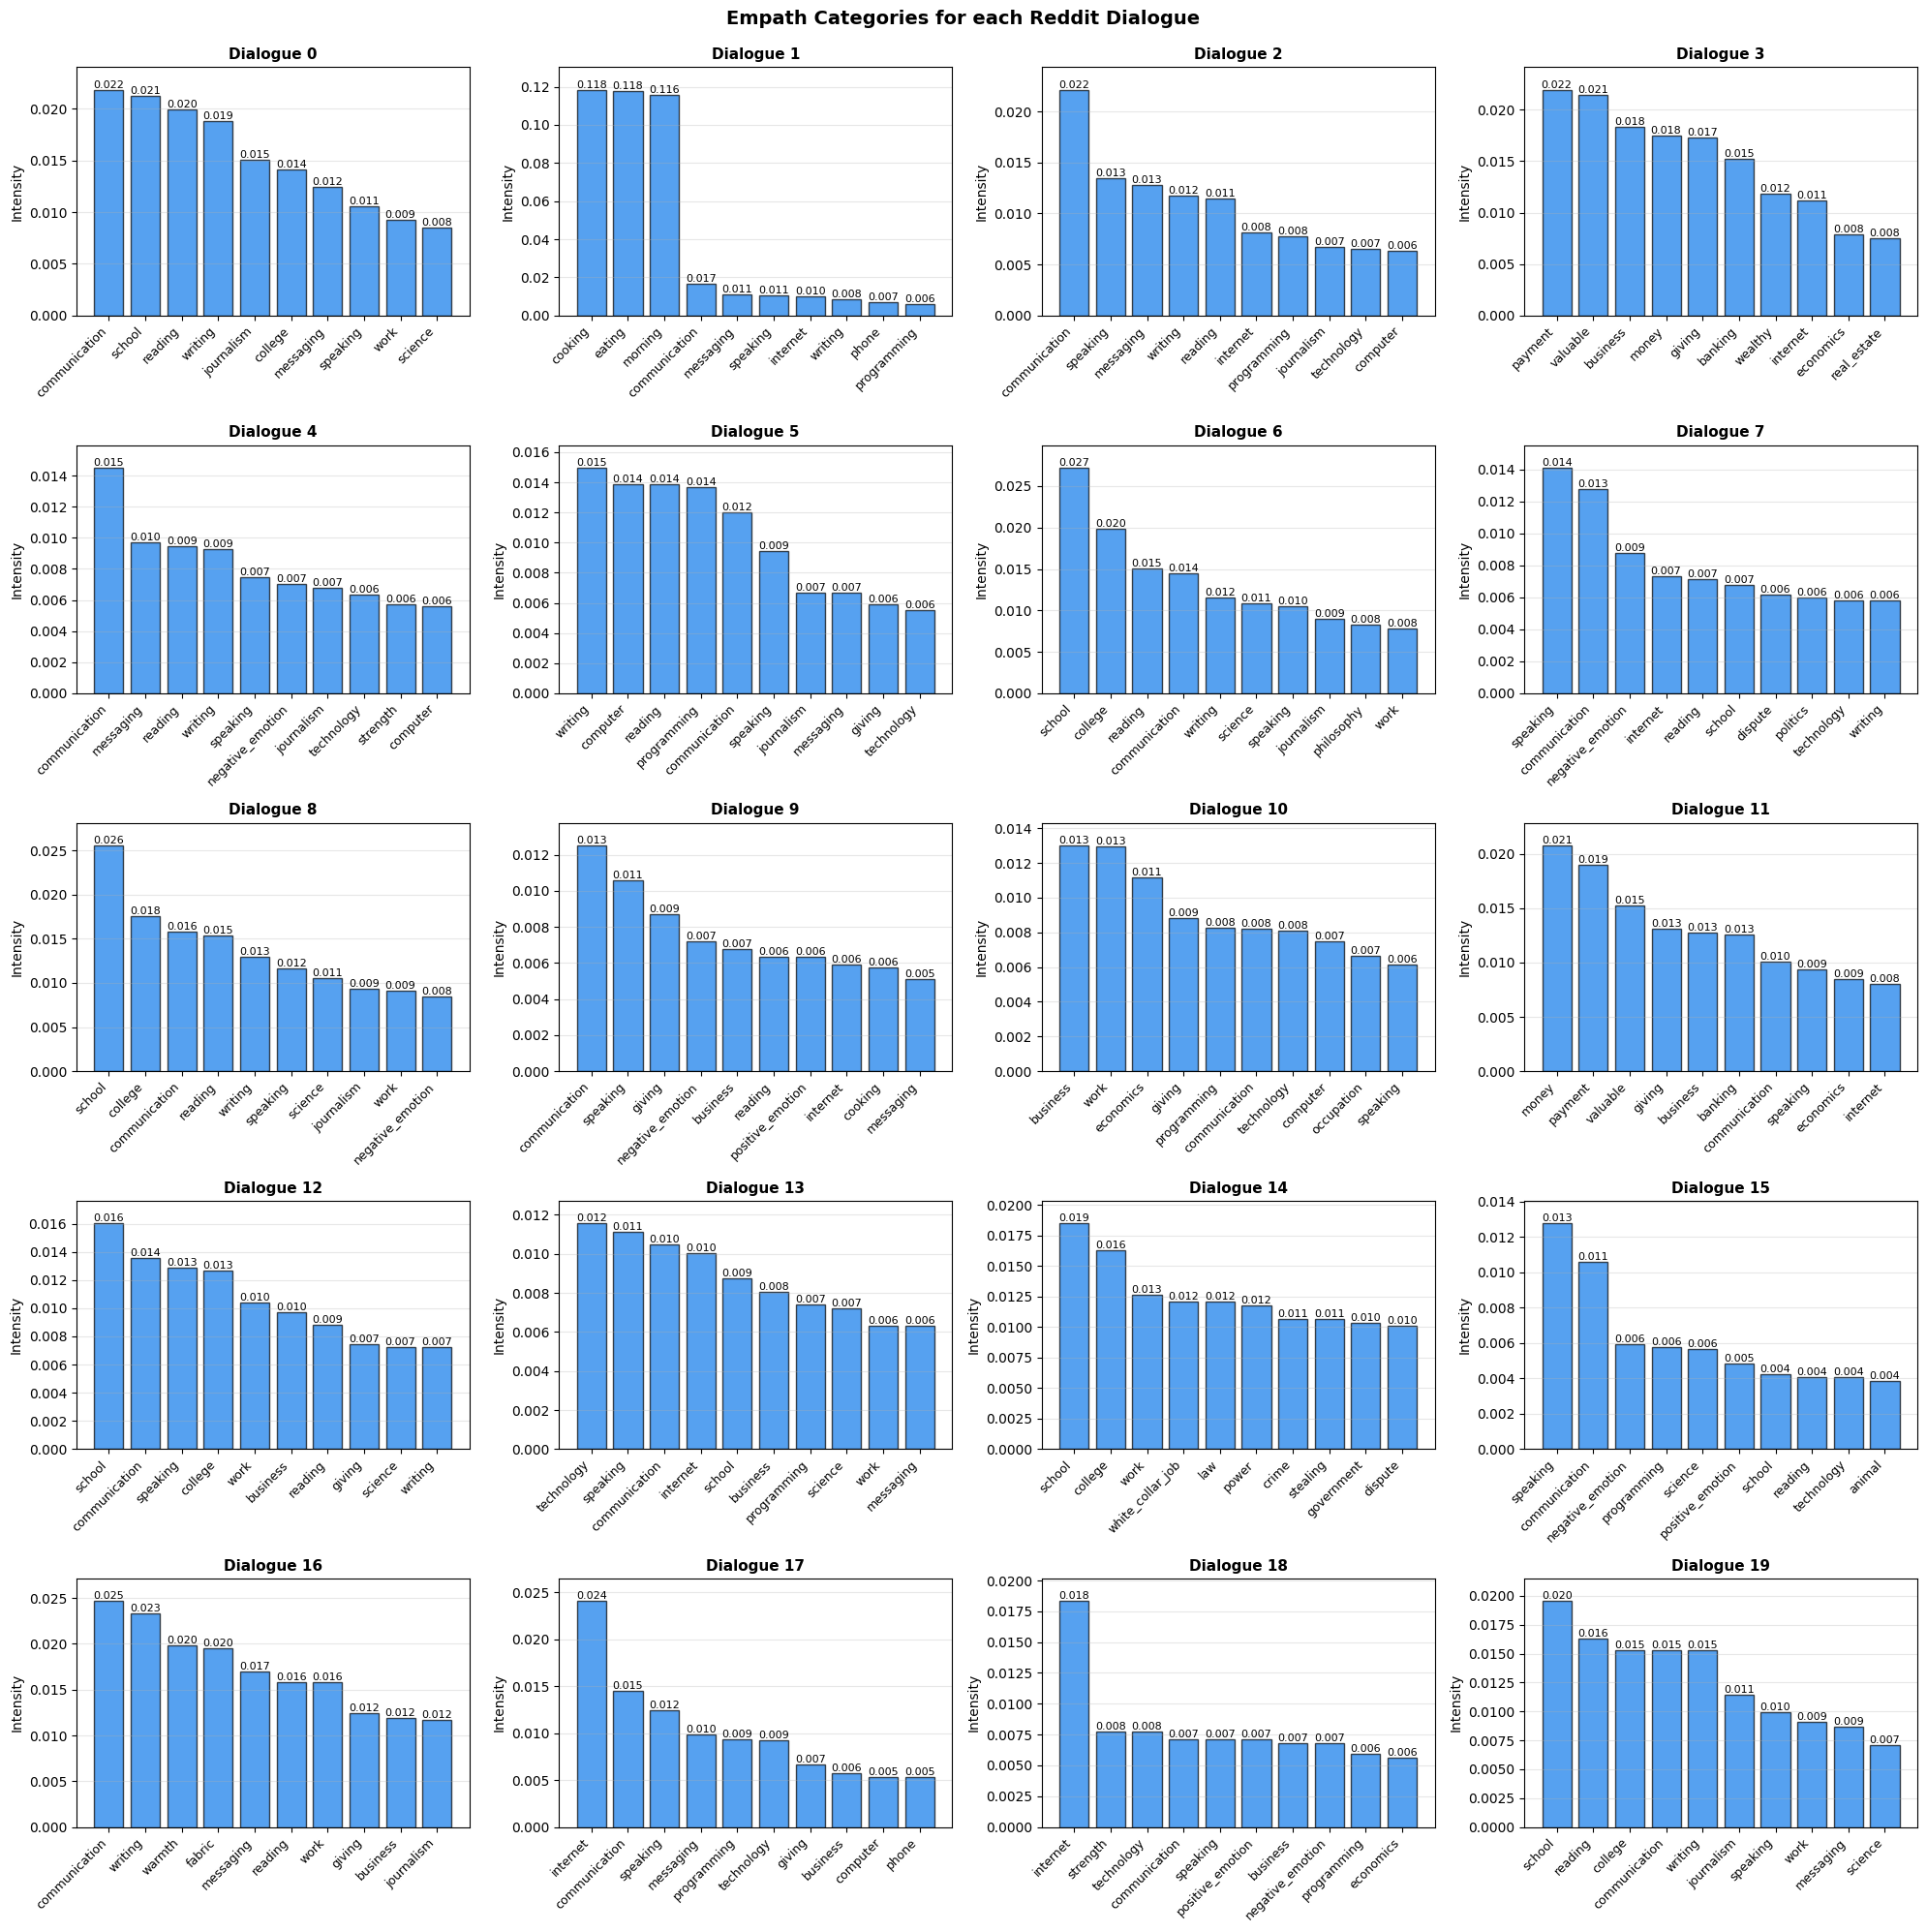

Dialogue 0: communication (0.0219) - school (0.0213) = Delta: 0.0006
Dialogue 1: cooking (0.1185) - eating (0.1176) = Delta: 0.0008
Dialogue 2: communication (0.0221) - speaking (0.0135) = Delta: 0.0086
Dialogue 3: payment (0.0219) - valuable (0.0214) = Delta: 0.0005
Dialogue 4: communication (0.0145) - messaging (0.0097) = Delta: 0.0048
Dialogue 5: writing (0.0150) - computer (0.0139) = Delta: 0.0011
Dialogue 6: school (0.0272) - college (0.0199) = Delta: 0.0074
Dialogue 7: speaking (0.0141) - communication (0.0128) = Delta: 0.0013
Dialogue 8: school (0.0256) - college (0.0176) = Delta: 0.0080
Dialogue 9: communication (0.0125) - speaking (0.0106) = Delta: 0.0019
Dialogue 10: business (0.0130) - work (0.0129) = Delta: 0.0001
Dialogue 11: money (0.0208) - payment (0.0190) = Delta: 0.0018
Dialogue 12: school (0.0160) - communication (0.0135) = Delta: 0.0025
Dialogue 13: technology (0.0116) - speaking (0.0111) = Delta: 0.0004
Dialogue 14: school (0.0185) - college (0.0163) = Delta: 0.002

In [ ]:
# Reddit Dataset

grouped = dataset_reddit.groupby('comment_parent_id')
print(grouped.size().sort_values(ascending=False).head(20))

# Dataset Reddit - Analysis
empath_reddit = []
for parent_id, group in grouped:

    if len(group) >= 140:
        # print(f"Parent ID: {parent_id}, Number of comments: {len(group)}")
        occurences = []

        # Extract comment_body for this parent_id
        comments = group['comment_body'].tolist()
        for comment in comments:
            occurences.append(str(comment))

        occurences_cleaned = []
        # Clean the dialogues: convert to string and remove URLs
        for comment in occurences:
            j = remove_urls(comment)
            occurences_cleaned.append(j)

        empath_reddit.append(lexicon.analyze(str(occurences_cleaned), normalize=True))

n_epochs = len(empath_reddit)
cols = 4
rows = math.ceil(n_epochs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
axes = axes.flatten()  

for epoch, risultati in enumerate(empath_reddit):
    ax = axes[epoch]
    
    # Order the categories by value in descending order and take the top 10
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)[:10]
    
    if sorted_categories:
        categories, values = zip(*sorted_categories)
        
        # Create the bar plot
        bars = ax.bar(range(len(categories)), values, color='#0F79EB', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Intensity', fontsize=10)
        ax.set_title(f'Dialogue {epoch}', fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_ylim(0, max(values) * 1.1)
        
        # Add value labels on top of the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{value:.3f}',
                   ha='center', va='bottom', fontsize=8)
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)

# Hide any unused subplots
for idx in range(len(empath_reddit), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Empath Categories for each Reddit Dialogue', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Difference between the first and second Empath category
deltas_reddit = []

for epoch, risultati in enumerate(empath_reddit):
    # Order the categories by value in descending order
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_categories) >= 2:
        # take the first and second category values
        first_value = sorted_categories[0][1]
        second_value = sorted_categories[1][1]
        
        # Compute the delta
        delta = first_value - second_value
        deltas_reddit.append(delta)
        
        print(f"Dialogue {epoch}: {sorted_categories[0][0]} ({first_value:.4f}) - {sorted_categories[1][0]} ({second_value:.4f}) = Delta: {delta:.4f}")
    else:
        print(f"Dialogue {epoch}: Not enough categories")

# Compute the average delta and print the results
if deltas_reddit:
    media_delta = np.mean(deltas_reddit)
    print(f"\n{'='*60}")
    print(f"Average delta between first and second category: {media_delta:.4f}")
    print(f"Number of dialogues analyzed: {len(deltas_reddit)}")
    print(f"Standard deviation: {np.std(deltas_reddit):.4f}")
else:
    print("No delta calculated")

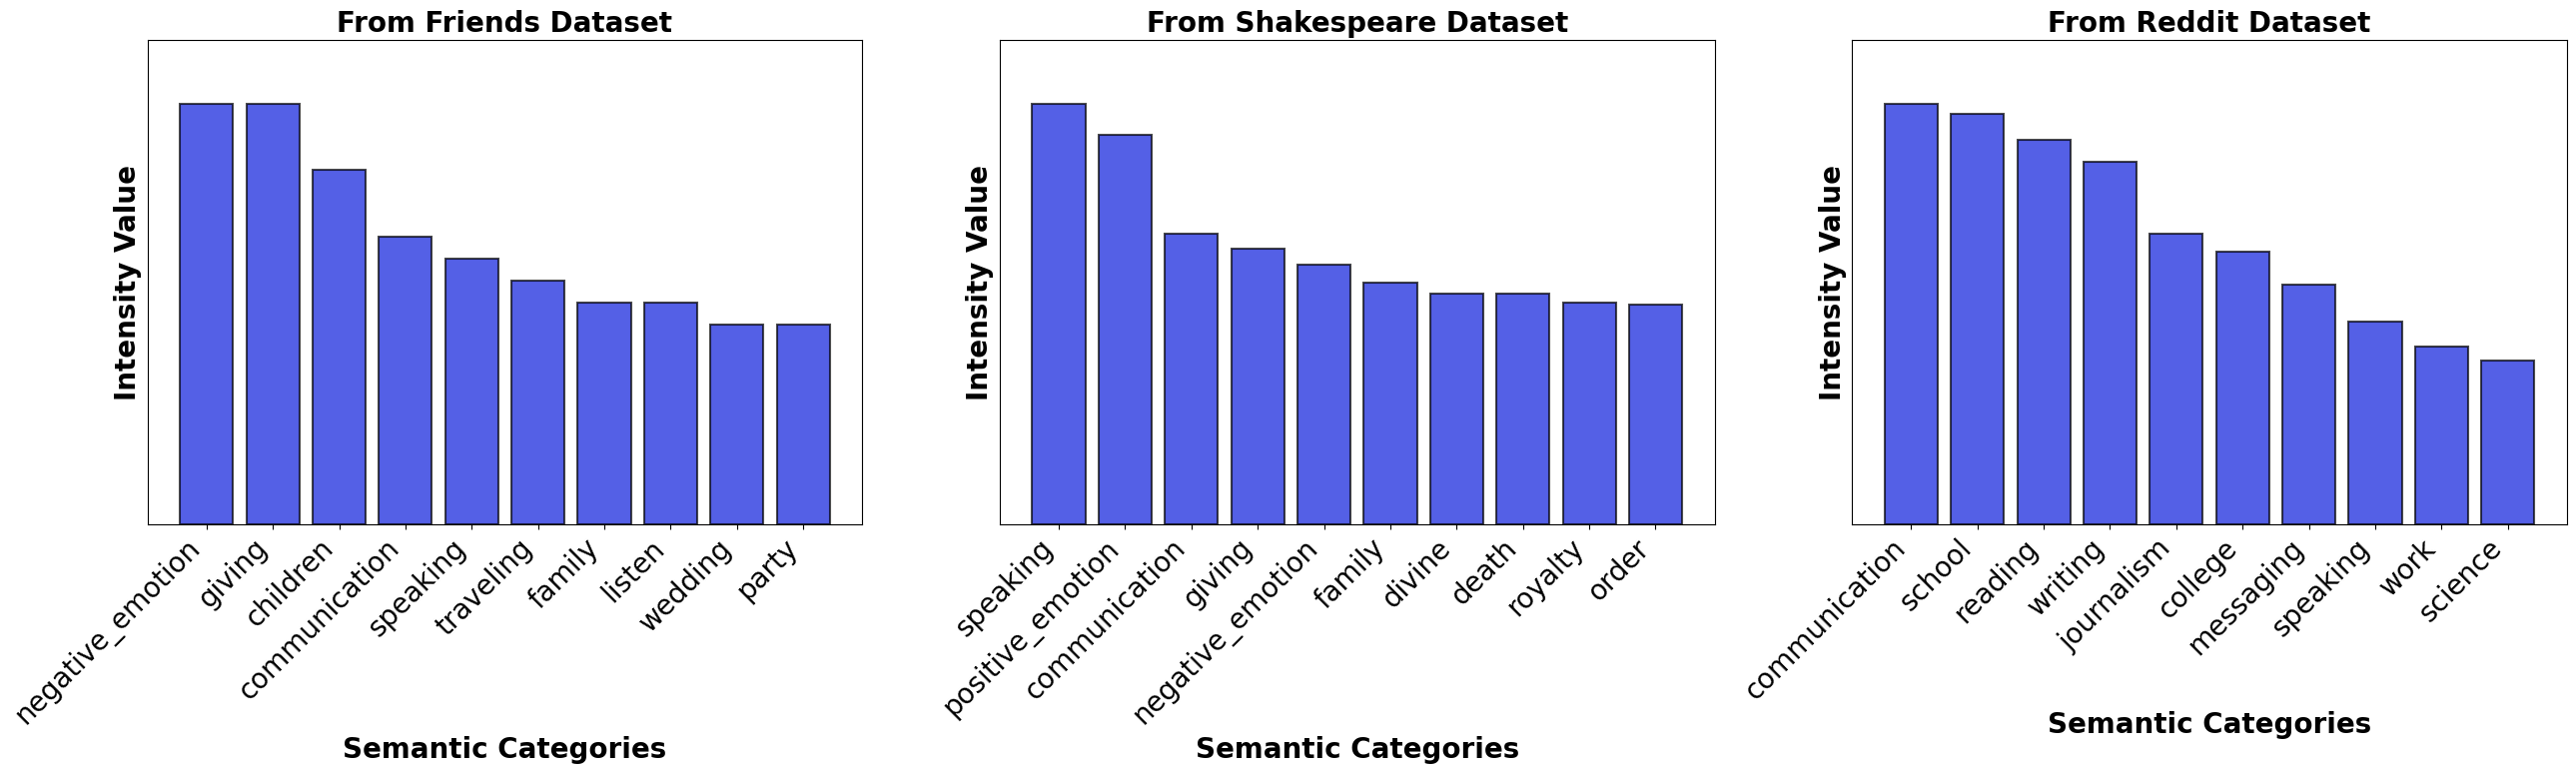

In [ ]:
# Extract the specific dialogues
dialogues = [
    ('From Friends Dataset', empath1[1]),       # Friends Season 2 Episode 2
    ('From Shakespeare Dataset', empath_shakespeare[0]),  # Shakespeare Play 0
    ('From Reddit Dataset', empath_reddit[0])           # Reddit Thread 0
]

fig, axes = plt.subplots(1, 3, figsize=(26, 8))
axes = axes.flatten()

for idx, (title, risultati) in enumerate(dialogues):
    ax = axes[idx]
    
    # Get top 10 categories sorted by intensity value
    sorted_categories = sorted(risultati.items(), key=lambda x: x[1], reverse=True)[:10]
    
    if sorted_categories:
        categories, values = zip(*sorted_categories)
        
        # Create bar plot
        bars = ax.bar(range(len(categories)), values, color="#0B1CDC", alpha=0.7, edgecolor='black', linewidth=1.5)
        
        # Set labels and title
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=20)
        ax.set_yticks([])
        ax.set_ylabel('Intensity Value', fontsize=20, fontweight='bold')
        ax.set_xlabel('Semantic Categories', fontsize=20, fontweight='bold')
        ax.set_title(title, fontsize=20, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        ax.set_ylim(0, max(values) * 1.15)
        
    else:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', 
                transform=ax.transAxes, fontsize=20)

plt.suptitle('', fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()

# Salvataggio a 600 DPI (qualità editoriale)
plt.savefig('HumanText_HighQuality.png', dpi=600, bbox_inches='tight')
plt.show()

Mean Delta across all texts: 0.0017
Standard Deviation of Deltas across all texts: 0.0022


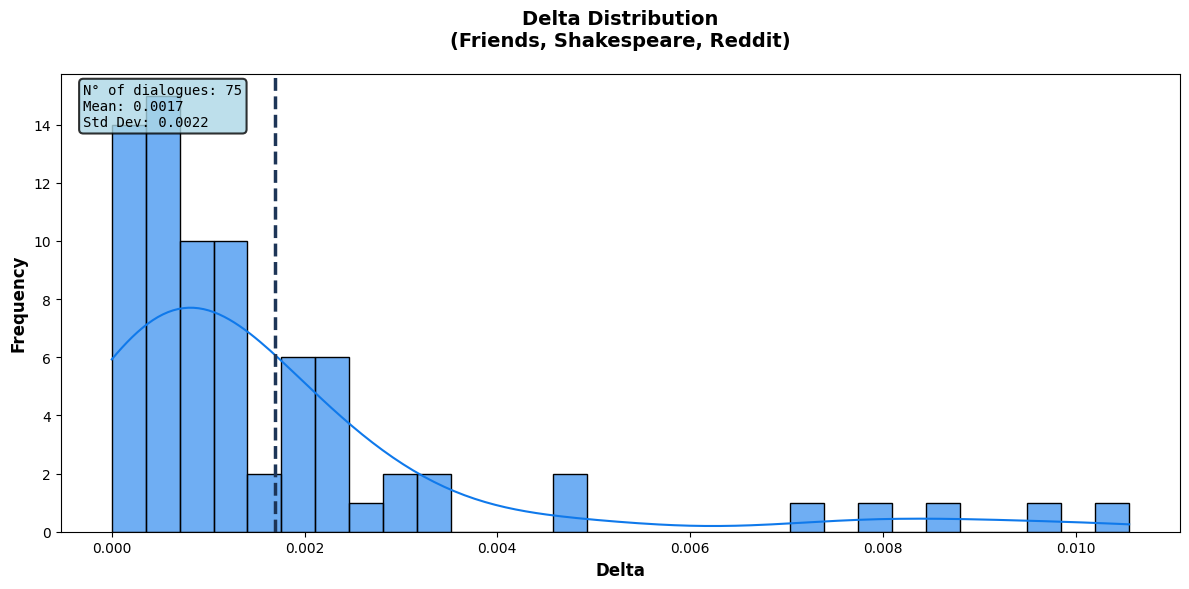

Mean Delta across all texts: 0.0017
Standard Deviation of Deltas across all texts: 0.0022


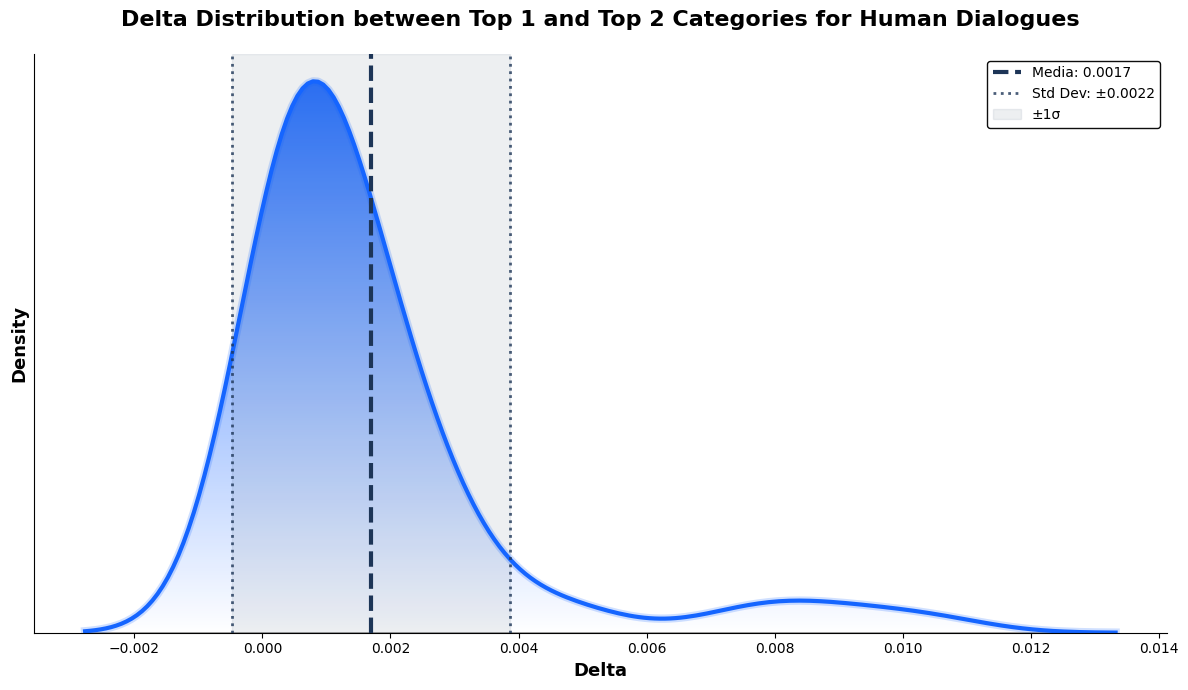

In [ ]:
# Human dialogues 

deltas_tot = deltas_friends + deltas_shakespeare + deltas_reddit
deltas_totali_mean = np.mean(deltas_tot)
deltas_totali_std = np.std(deltas_tot)
print(f"Mean Delta across all texts: {deltas_totali_mean:.4f}")
print(f"Standard Deviation of Deltas across all texts: {deltas_totali_std:.4f}")

# Istogram 
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(deltas_tot, bins=30, kde=True, color='#0F79EB', alpha=0.6, edgecolor='black', ax=ax)
ax.axvline(deltas_totali_mean, color='#1D3557', linestyle='--', linewidth=2.5, label=f'Mean Delta: {deltas_totali_mean:.4f}')
ax.set_xlabel('Delta', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Delta Distribution\n(Friends, Shakespeare, Reddit)', fontsize=14, fontweight='bold', pad=20)
textstr = f'N° of dialogues: {len(deltas_tot)}\nMean: {deltas_totali_mean:.4f}\nStd Dev: {deltas_totali_std:.4f}'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8, edgecolor='black', linewidth=1.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props, family='monospace')
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------

import matplotlib.patheffects as pe
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.path import Path
from matplotlib.patches import PathPatch

mean_delta = np.mean(deltas_tot)
std_delta = np.std(deltas_tot)

print(f"Mean Delta across all texts: {mean_delta:.4f}")
print(f"Standard Deviation of Deltas across all texts: {std_delta:.4f}")

plt.style.use("default")
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

main_color = "#1565FF"   # Blu coerente Human
mean_color = "#1D3557"

sns.kdeplot(
    deltas_tot,
    fill=False,
    color=main_color,
    linewidth=3,
    ax=ax
)

for line in ax.lines:
    line.set_path_effects([
        pe.Stroke(linewidth=6, foreground=line.get_color(), alpha=0.2),
        pe.Normal()
    ])

def gradient_fill(line, color):
    x = line.get_xdata()
    y = line.get_ydata()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    vertices = np.concatenate([
        np.column_stack([x, y]),
        np.column_stack([x[::-1], np.zeros_like(y)])
    ])

    path = Path(vertices)
    patch = PathPatch(path, facecolor="none")
    ax.add_patch(patch)

    gradient = np.linspace(0, 1, 256).reshape(256, 1)
    cmap = LinearSegmentedColormap.from_list("", ["white", color])

    im = ax.imshow(
        gradient,
        extent=[x.min(), x.max(), 0, y.max()],
        origin='lower',
        aspect='auto',
        cmap=cmap,
        alpha=0.9,
        zorder=1
    )

    im.set_clip_path(patch)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

gradient_fill(ax.lines[0], main_color)

ax.axvline(mean_delta,
           color=mean_color,
           linestyle='--',
           linewidth=3,
           label=f'Media: {mean_delta:.4f}',
           zorder=5)

ax.axvline(mean_delta - std_delta,
           color=mean_color,
           linestyle=':',
           linewidth=2,
           alpha=0.8)

ax.axvline(mean_delta + std_delta,
           color=mean_color,
           linestyle=':',
           linewidth=2,
           alpha=0.8,
           label=f'Std Dev: ±{std_delta:.4f}')

ax.axvspan(mean_delta - std_delta,
           mean_delta + std_delta,
           alpha=0.08,
           color=mean_color,
           label='±1σ')

ax.set_title('Delta Distribution between Top 1 and Top 2 Categories for Human Dialogues',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Delta', fontsize=13, fontweight='bold')
ax.set_ylabel('Density', fontsize=13, fontweight='bold')

ax.grid(False)
ax.set_yticks([])
ax.tick_params(axis='y', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper right',
          fontsize=10,
          framealpha=0.95,
          facecolor='white',
          edgecolor='black')

plt.tight_layout()
plt.show()

Number of AI generated dialogues: 25


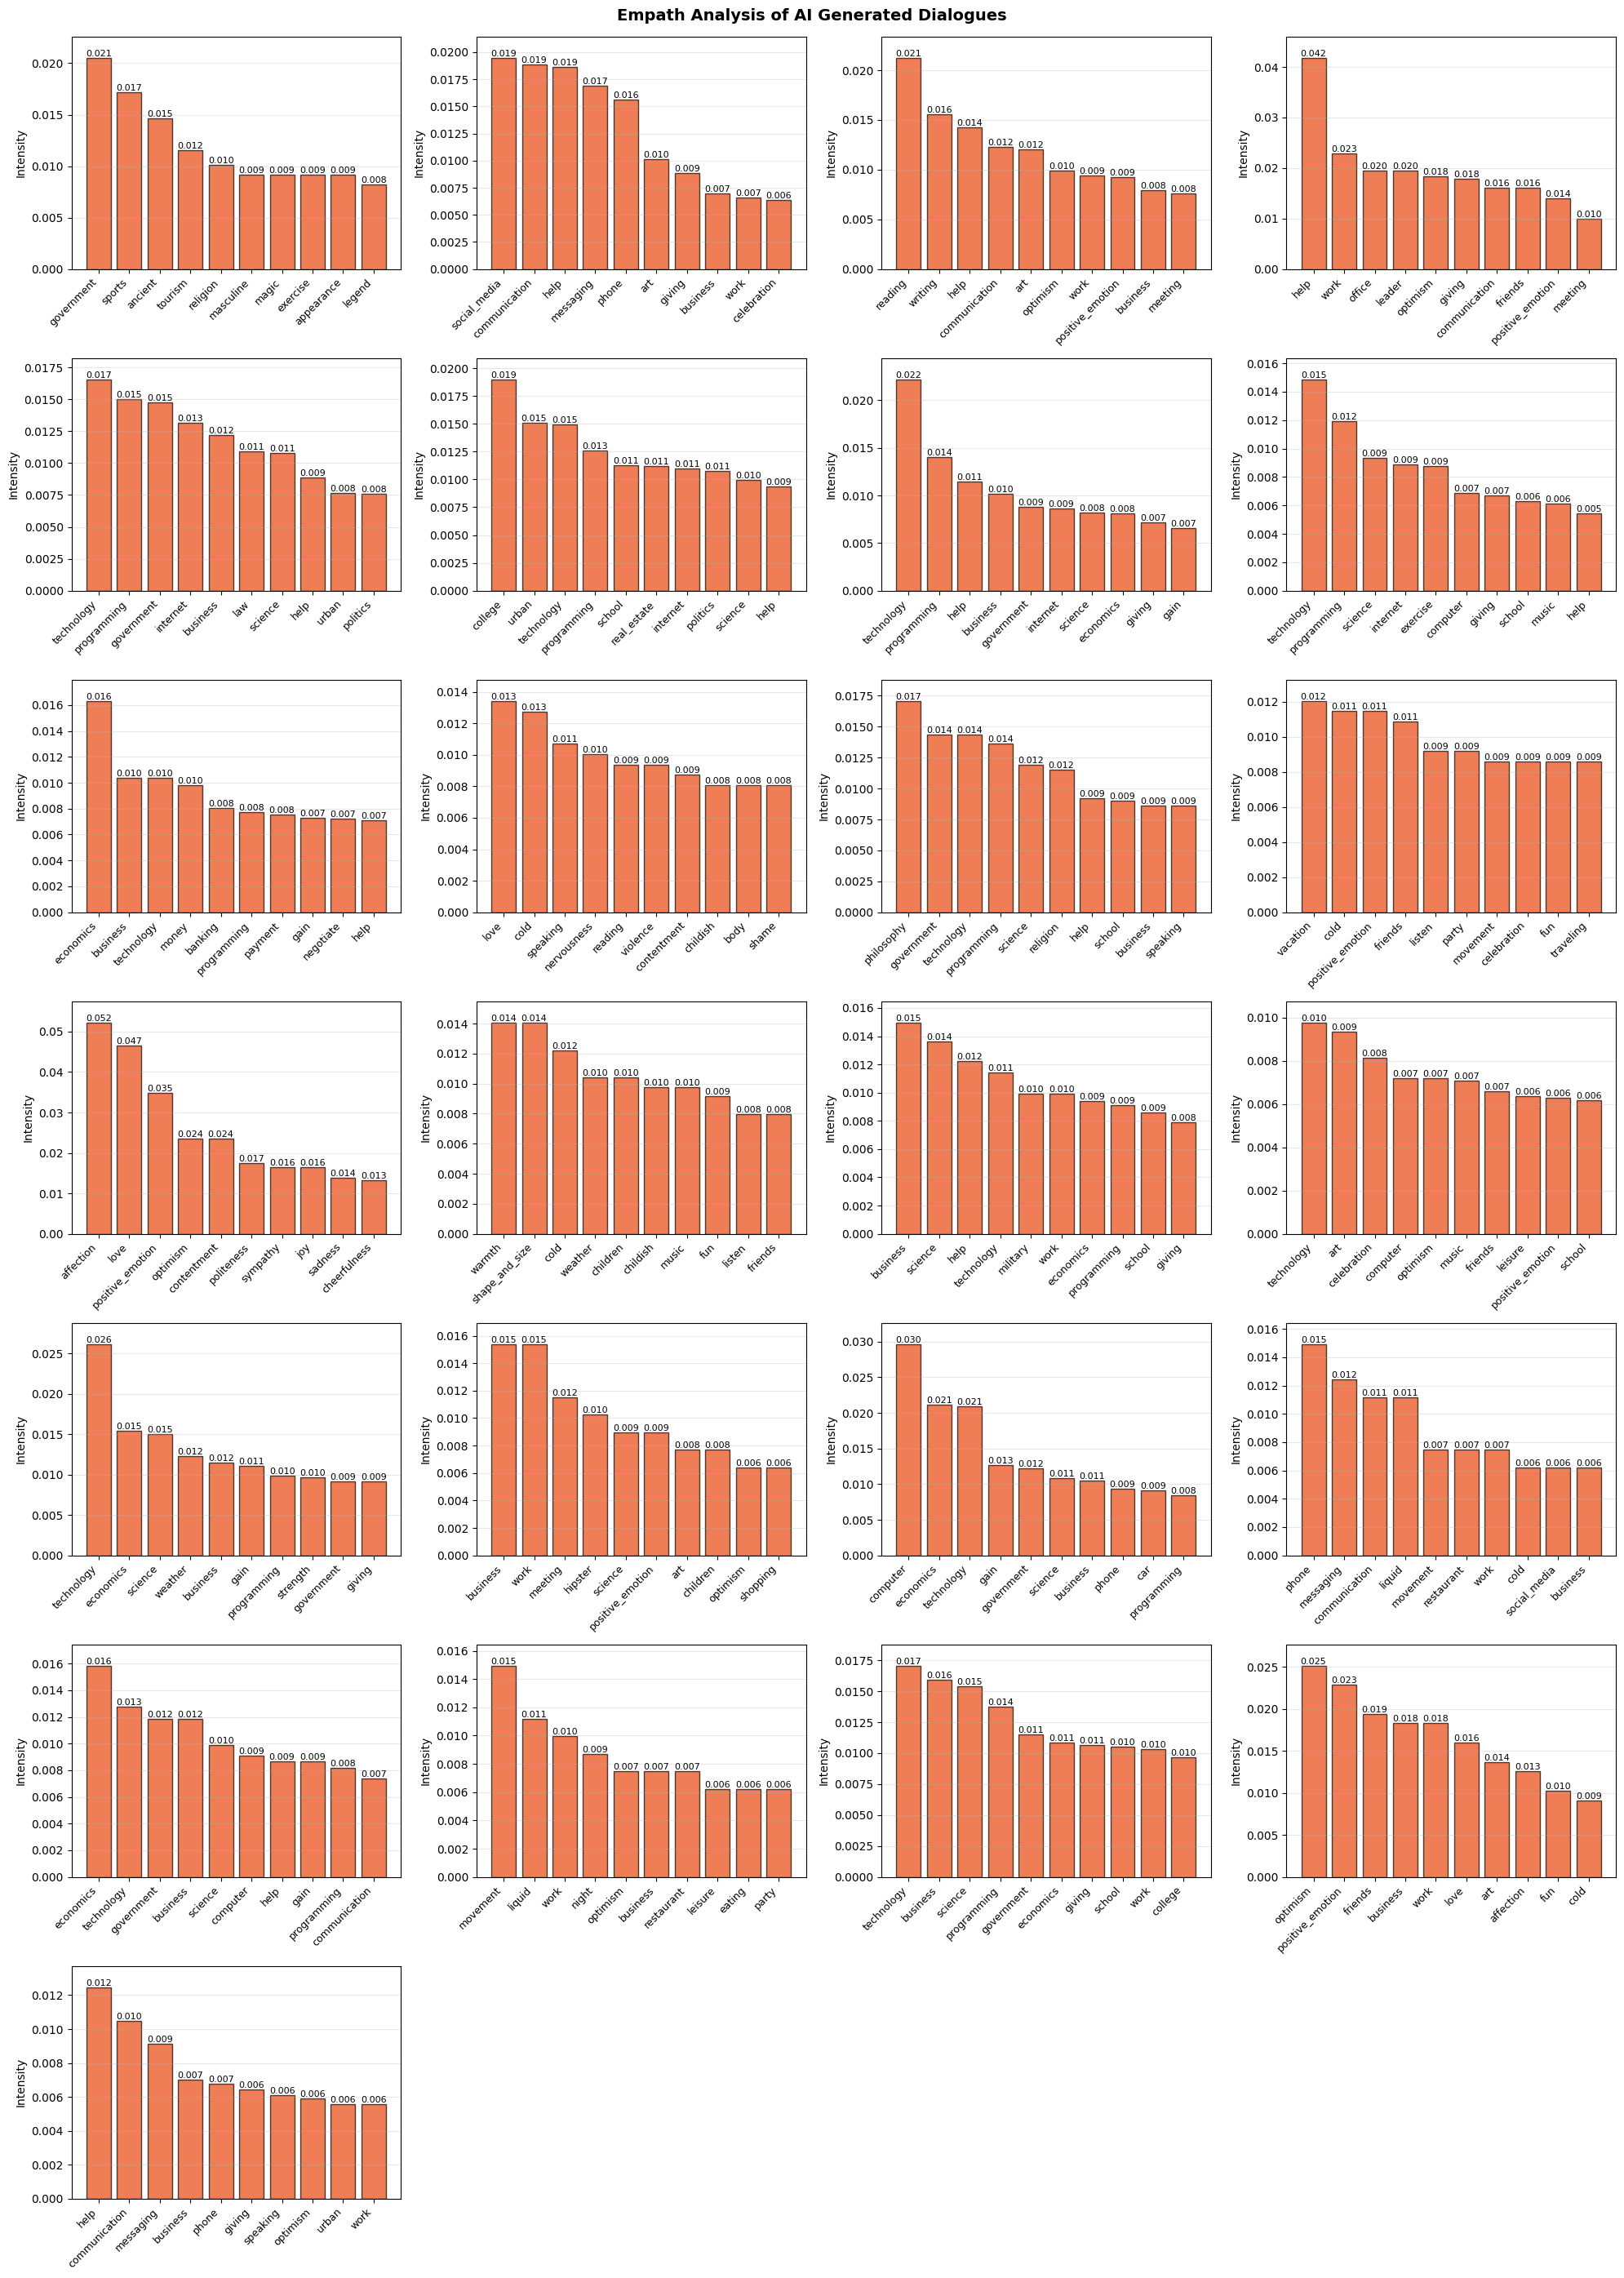

Mean Delta between Top 1 and Top 2 Categories: 0.003853
Standard Deviation of Delta: 0.004141


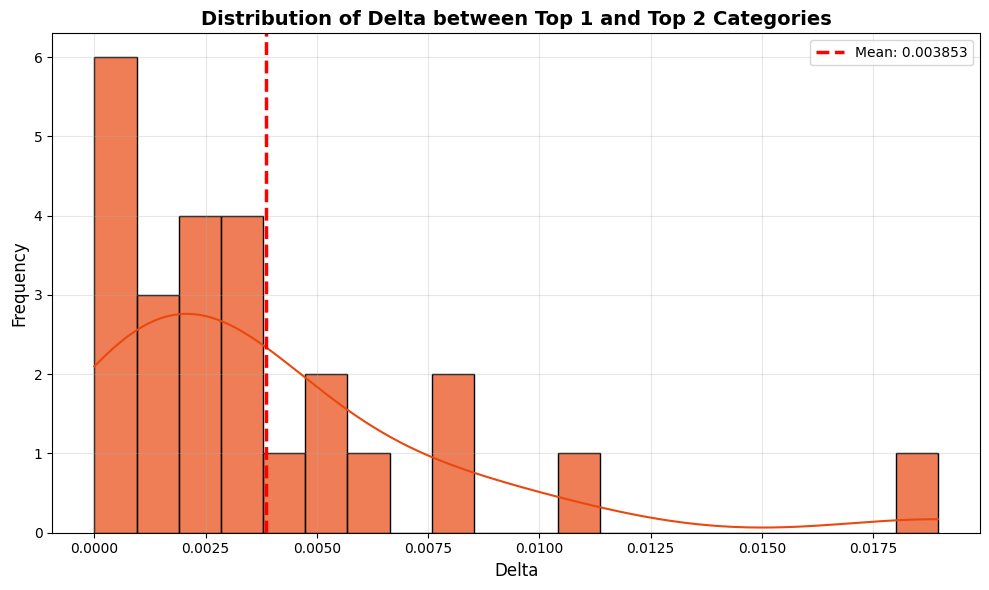

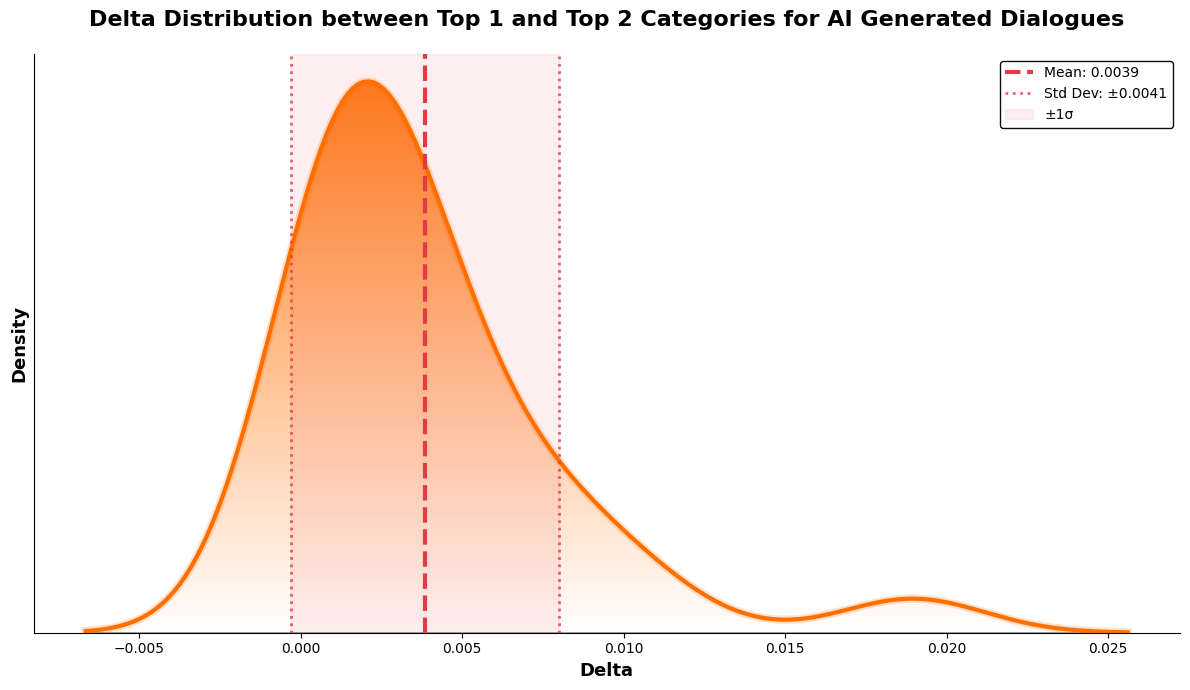

In [ ]:
# AI dialogues 

files = []
for file in os.listdir(dataset):
    if file.endswith(".txt"):
        files.append(os.path.join(dataset, file))

print("Number of AI generated dialogues:", len(files))

# Read the content of the files and analyze with Empath
ai_texts_analysis = []

for file_path in files:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Empath analysis
    analysis = lexicon.analyze(text, normalize=True)
    ai_texts_analysis.append({
        'filename': os.path.basename(file_path),
        'text': text,
        'analysis': analysis
    })

# Visualize the graphs 
n_texts = len(ai_texts_analysis)
cols = 4
rows = math.ceil(n_texts / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
axes = axes.flatten()

for idx, item in enumerate(ai_texts_analysis):
    ax = axes[idx]
    
    # Order the categories by value in descending order and take the top 10
    sorted_categories = sorted(item['analysis'].items(), key=lambda x: x[1], reverse=True)[:10]
    
    if sorted_categories:
        categories, values = zip(*sorted_categories)
        
        bars = ax.bar(range(len(categories)), values, color='#E9480E', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Intensity', fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_ylim(0, max(values) * 1.1)
        
        # Add value labels on top of the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{value:.3f}',
                   ha='center', va='bottom', fontsize=8)

# Hide any unused subplots
for idx in range(len(ai_texts_analysis), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Empath Analysis of AI Generated Dialogues', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Compute deltas
deltas = []

for item in ai_texts_analysis:
    sorted_categories = sorted(item['analysis'].items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_categories) >= 2:
        top1_value = sorted_categories[0][1]
        top2_value = sorted_categories[1][1]
        delta = top1_value - top2_value
        deltas.append(delta)

mean_delta = np.mean(deltas)
std_delta = np.std(deltas)
print(f"Mean Delta between Top 1 and Top 2 Categories: {mean_delta:f}")
print(f"Standard Deviation of Delta: {std_delta:f}")

# Deltas distribution with Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(deltas, bins=20, kde=True, color='#E9480E', alpha=0.7, edgecolor='black', ax=ax)
ax.axvline(np.mean(deltas), color='red', linestyle='--', linewidth=2.5, label=f'Mean: {np.mean(deltas):f}')
ax.set_title('Distribution of Delta between Top 1 and Top 2 Categories', fontsize=14, fontweight='bold')
ax.set_xlabel('Delta', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------

import matplotlib.patheffects as pe
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.path import Path
from matplotlib.patches import PathPatch

plt.style.use("default")
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

main_color = "#FF6F00"   # Arancione coerente con AI precedente
mean_color = "#E63946"

sns.kdeplot(
    deltas,
    fill=False,
    color=main_color,
    linewidth=3,
    ax=ax
)

for line in ax.lines:
    line.set_path_effects([
        pe.Stroke(linewidth=6, foreground=line.get_color(), alpha=0.2),
        pe.Normal()
    ])

def gradient_fill(line, color):
    x = line.get_xdata()
    y = line.get_ydata()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    vertices = np.concatenate([
        np.column_stack([x, y]),
        np.column_stack([x[::-1], np.zeros_like(y)])
    ])

    path = Path(vertices)
    patch = PathPatch(path, facecolor="none")
    ax.add_patch(patch)

    gradient = np.linspace(0, 1, 256).reshape(256, 1)
    cmap = LinearSegmentedColormap.from_list("", ["white", color])

    im = ax.imshow(
        gradient,
        extent=[x.min(), x.max(), 0, y.max()],
        origin='lower',
        aspect='auto',
        cmap=cmap,
        alpha=0.9,
        zorder=1
    )

    im.set_clip_path(patch)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

gradient_fill(ax.lines[0], main_color)

ax.axvline(mean_delta,
           color=mean_color,
           linestyle='--',
           linewidth=3,
           label=f'Mean: {mean_delta:.4f}',
           zorder=5)

ax.axvline(mean_delta - std_delta,
           color=mean_color,
           linestyle=':',
           linewidth=2,
           alpha=0.8)

ax.axvline(mean_delta + std_delta,
           color=mean_color,
           linestyle=':',
           linewidth=2,
           alpha=0.8,
           label=f'Std Dev: ±{std_delta:.4f}')

ax.axvspan(mean_delta - std_delta,
           mean_delta + std_delta,
           alpha=0.08,
           color=mean_color,
           label='±1σ')

ax.set_title('Delta Distribution between Top 1 and Top 2 Categories for AI Generated Dialogues',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Delta', fontsize=13, fontweight='bold')
ax.set_ylabel('Density', fontsize=13, fontweight='bold')

ax.grid(False)
ax.set_yticks([])
ax.tick_params(axis='y', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper right',
          fontsize=10,
          framealpha=0.95,
          facecolor='white',
          edgecolor='black')

plt.tight_layout()
plt.show()

In [ ]:
# T-Test

AI_deltas = deltas  # Deltas from AI texts
human_deltas = deltas_tot  # Deltas from human texts (Friends, Shakespeare, Reddit)

t_stat, p_value = stats.ttest_ind(AI_deltas, human_deltas, equal_var=False)
print("Welch = ")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Welch = 
T-statistic: 2.4462
P-value: 0.0209


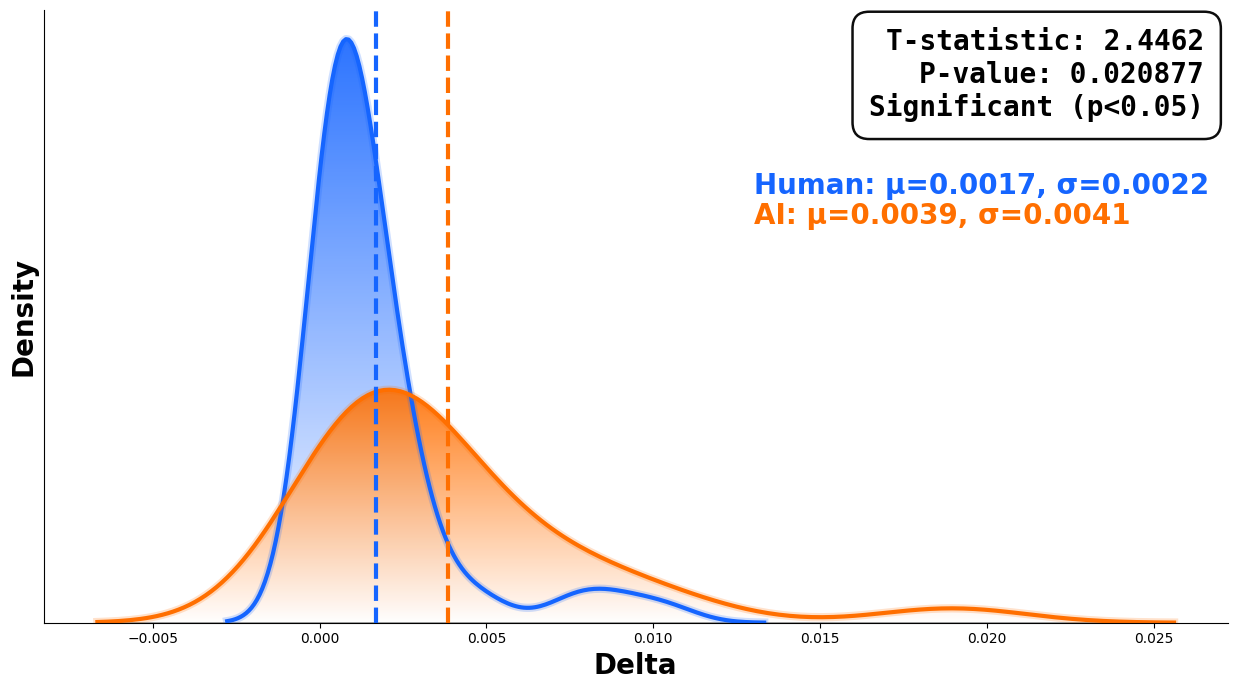

In [ ]:
plt.style.use("default")
fig, ax = plt.subplots(figsize=(13, 7))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

human_color = "#1565FF"   # Blu intenso
ai_color = "#FF6F00"      # Arancione acceso

sns.kdeplot(
    human_deltas,
    fill=False,
    color=human_color,
    linewidth=3,
    ax=ax,
    label='Testi Umani'
)

sns.kdeplot(
    AI_deltas,
    fill=False,
    color=ai_color,
    linewidth=3,
    ax=ax,
    label='Testi AI'
)

for line in ax.lines:
    line.set_path_effects([
        pe.Stroke(linewidth=6, foreground=line.get_color(), alpha=0.2),
        pe.Normal()
    ])

def gradient_fill(line, color):
    x = line.get_xdata()
    y = line.get_ydata()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    vertices = np.concatenate([
        np.column_stack([x, y]),
        np.column_stack([x[::-1], np.zeros_like(y)])
    ])

    path = Path(vertices)
    patch = PathPatch(path, facecolor="none")
    ax.add_patch(patch)

    gradient = np.linspace(0, 1, 256).reshape(256, 1)
    cmap = LinearSegmentedColormap.from_list("", ["white", color])

    im = ax.imshow(
        gradient,
        extent=[x.min(), x.max(), 0, y.max()],
        origin='lower',
        aspect='auto',
        cmap=cmap,
        alpha=0.9,
        zorder=1
    )

    im.set_clip_path(patch)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

gradient_fill(ax.lines[0], human_color)
gradient_fill(ax.lines[1], ai_color)

ax.axvline(np.mean(human_deltas),
           color=human_color,
           linestyle='--',
           linewidth=3)

ax.axvline(np.mean(AI_deltas),
           color=ai_color,
           linestyle='--',
           linewidth=3)

ax.set_title('', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Delta', fontsize=20, fontweight='bold')
ax.set_ylabel('Density', fontsize=20, fontweight='bold')

ax.grid(False)
ax.set_yticks([])
ax.tick_params(axis='y', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

textstr = f'T-statistic: {t_stat:.4f}\nP-value: {p_value:.6f}\n{"Significant (p<0.05)" if p_value < 0.05 else "Not significant (p≥0.05)"}'

props = dict(
    boxstyle='round,pad=0.6',
    facecolor='white',
    alpha=0.95,
    edgecolor='black',
    linewidth=1.8
)

ax.text(
    0.98, 0.97,
    textstr,
    transform=ax.transAxes,
    fontsize=20,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=props,
    family='monospace',
    fontweight='bold'
)

legend_labels = [
    f'Human: μ={np.mean(human_deltas):.4f}, σ={np.std(human_deltas):.4f}',
    f'AI: μ={np.mean(AI_deltas):.4f}, σ={np.std(AI_deltas):.4f}'
]

ax.text(
    0.6, 0.7,
    legend_labels[0],
    transform=ax.transAxes,
    fontsize=20,
    color=human_color,
    fontweight='bold'
)

ax.text(
    0.6, 0.65,
    legend_labels[1],
    transform=ax.transAxes,
    fontsize=20,
    color=ai_color,
    fontweight='bold'
)

plt.tight_layout()
plt.savefig('ConfrontoDistribuzioni_HighQuality.png', dpi=600, bbox_inches='tight')
plt.show()